In [3]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory
from obspy import Stream

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
client = FDSN_Client("IRIS")
print(client)
starttime = "2008-07-10 11:00:00.000"
endtime = "2008-12-29 11:00:00.000"

FDSN Webservice Client (base url: http://service.iris.edu)
Available Services: 'dataselect' (v1.1.9), 'event' (v1.1.13), 'station' (v1.1.52), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


12 Event(s) in Catalog:
2008-11-17T11:04:47.100000Z | +22.626, +103.255 | 3.1 ML
2008-11-16T16:21:12.800000Z | +21.683, +103.426 | 2.6 ML
...
2008-07-30T20:54:40.400000Z | +20.796, +105.808 | 2.7 MD
2008-07-10T15:53:20.800000Z | +20.495, +108.406 | 3.3 MD
To see all events call 'print(CatalogObject.__str__(print_all=True))'


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


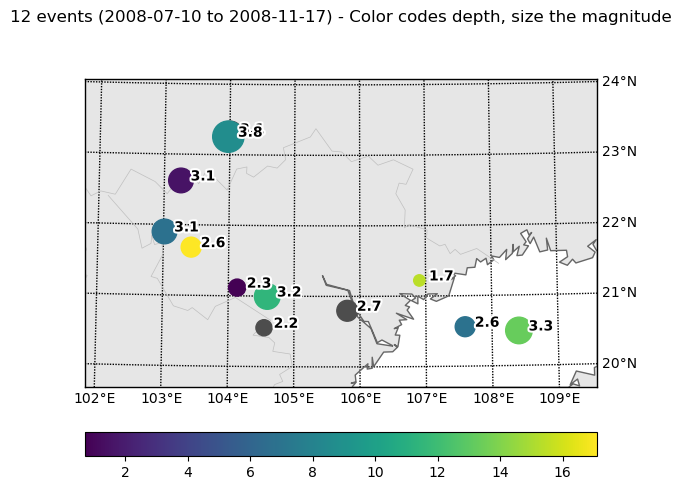

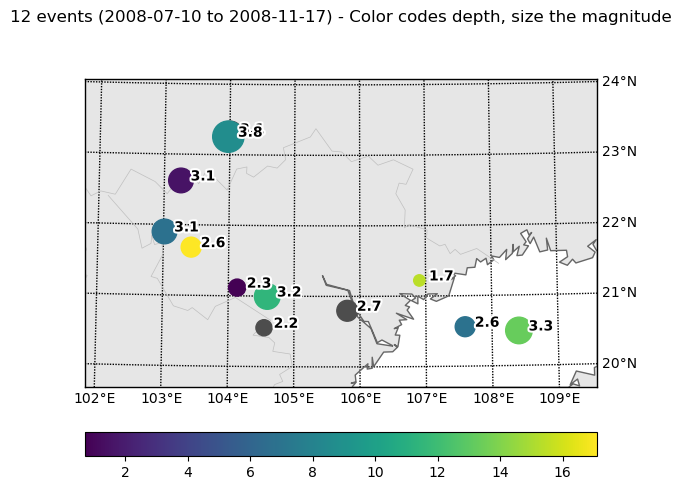

In [5]:
# Lấy dữ liệu các sự kiện
cat = client.get_events(starttime=starttime, endtime=endtime, latitude=21.04269,longitude=105.845909,maxradius=3.4, minmagnitude=1, maxmagnitude=6.0, maxdepth=20)
print(cat)
cat.plot(projection="local")

In [6]:
#ghi tọa độ các sự kiện địa chấn vào file txt
cat = client.get_events(starttime=starttime, endtime=endtime, latitude=21.04269,longitude=105.845909,maxradius=3.4, minmagnitude=1, maxmagnitude=6.0, maxdepth=20)
with open('event_VN.txt', 'w') as file:
    for event in cat:
        latitude = event.origins[0].latitude
        longitude = event.origins[0].longitude
        file.write(f'{latitude}, {longitude}\n')

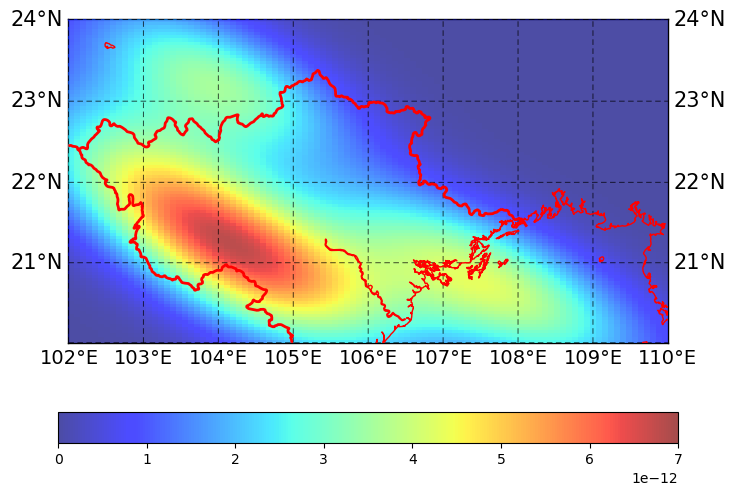

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

# Đọc tọa độ từ file text
data = np.loadtxt('event_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=102, llcrnrlat=20, urcrnrlon=110, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo lưới tọa độ
numcols, numrows = 100, 100
lons = np.linspace(102, 110, numcols)
lats = np.linspace(20, 24, numrows)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Tạo đối tượng gaussian_kde
kde = gaussian_kde(np.vstack([x, y]))

# Tính toán mật độ dữ liệu tại các điểm trên lưới 2D
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape((numrows, numcols))

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(8,6))
norm = plt.Normalize(vmin=0, vmax=7e-12)
im = ax.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], cmap='jet', origin='lower', alpha=0.7, norm =norm)
plt.colorbar(im, orientation='horizontal', location='bottom')

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([20,21,22,23,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,103,104,105,106,107, 108,109,110]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=14)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='k', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 2)


plt.savefig('./density_eventVN.png')
plt.show()